## Capstone Project Notebook

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-02-20 11:45:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-02-20 11:45:27 (11.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [141]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [142]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [143]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [144]:
df.shape

(346, 10)

In [145]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [146]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

In [147]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [148]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [149]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [150]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [151]:
Feat = df[['Principal','terms','age','Gender','weekend']]
Feat = pd.concat([Feat,pd.get_dummies(df['education'])], axis=1)
Feat.drop(['Master or Above'], axis = 1,inplace=True)
Feat.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [152]:
X = Feat
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [153]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [154]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# KNN

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [157]:
acc = list()

In [158]:
k = np.array(range(1,11))
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [159]:
for n in k :
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append((metrics.accuracy_score(y_test, yhat)))
print(acc)

[0.67142857142857137, 0.65714285714285714, 0.7142857142857143, 0.68571428571428572, 0.75714285714285712, 0.7142857142857143, 0.7857142857142857, 0.75714285714285712, 0.75714285714285712, 0.67142857142857137]


Text(0.5,1,'Change in test accuracy with k values')

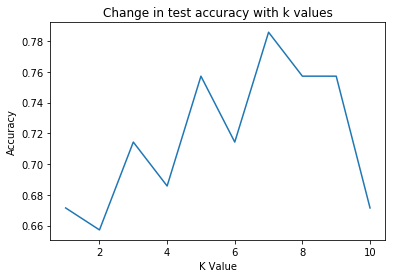

In [160]:
plt.plot(k,acc)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Change in test accuracy with k values")

# Model has the most accuracy when k=7

In [161]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
Train set Accuracy:  0.807971014493
Test set Accuracy:  0.785714285714


In [162]:
jaccard_knn = jaccard_similarity_score(y_test, yhat)
jaccard_knn

0.7857142857142857

In [163]:
f1_knn = f1_score(y_test, yhat, average='weighted')
f1_knn

0.77665402444163512

In [164]:
lknn = log_loss(y_test, yhat)
lknn

7.4012691757218851

# Decision Trees

In [165]:
#using the same xtrain, xtest, ytrain, ytest values
from sklearn.tree import DecisionTreeClassifier

In [166]:
kdt= np.array(range(1,11))
accdt = list()

In [167]:
for n in kdt :
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    loanTree # it shows the default parameters
    loanTree.fit(X_train,y_train)
    predTree = loanTree.predict(X_test)
    accdt.append(metrics.accuracy_score(y_test, predTree))

In [168]:
print(kdt,accdt)

[ 1  2  3  4  5  6  7  8  9 10] [0.7857142857142857, 0.7857142857142857, 0.61428571428571432, 0.61428571428571432, 0.6428571428571429, 0.77142857142857146, 0.75714285714285712, 0.75714285714285712, 0.65714285714285714, 0.69999999999999996]


Text(0.5,1,'Change in test accuracy with k values')

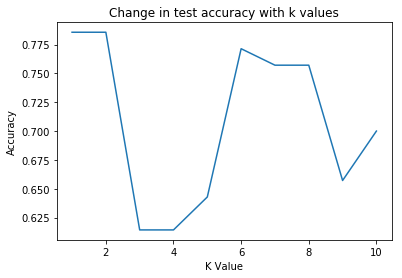

In [169]:
plt.plot(kdt,accdt)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Change in test accuracy with k values")

### We get the best accuracy if k=1 or k=2

In [170]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)

In [171]:
jaccard_dt = jaccard_similarity_score(y_test, predTree)
jaccard_dt

0.7857142857142857

In [172]:
f1_dt = f1_score(y_test, predTree, average='weighted')
f1_dt

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.69142857142857139

In [173]:
ldt = log_loss(y_test, predTree)
ldt

7.4013377126444748

# SVM

In [174]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [176]:
jaccard_svm = jaccard_similarity_score(y_test, yhat)
jaccard_svm

0.7857142857142857

In [177]:
f1_svm = f1_score(y_test, yhat, average='weighted')
f1_svm

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.69142857142857139

In [178]:
lsvm = log_loss(y_test, yhat)
lsvm

7.4013377126444748

# Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1])

In [181]:
jaccard_lr = jaccard_similarity_score(y_test, yhat)
jaccard_lr

0.68571428571428572

In [182]:
f1_lr = f1_score(y_test, yhat, average='weighted')
f1_lr

0.66705224599961443

In [183]:
l_lr = log_loss(y_test, yhat)
l_lr

10.85519250649468